In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
import os

path ="/content/drive/MyDrive/braille/train/"
files = os.listdir(path)[:11]
print(files)

classes={'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'J':9, 'K':10}

['G', 'D', 'C', 'I', 'F', 'E', 'A', 'J', 'H', 'B', 'K']


In [28]:
import cv2
x=[]
y=[]

for cl in classes:
  pth = path+cl
  for img_name in os.listdir(pth):
    img = cv2.imread(pth+"/"+img_name,0)
    img = cv2.resize(img, (64, 64))
    x.append(img)
    y.append(classes[cl])

print("Successful")

Successful


In [29]:
pd.Series(y).value_counts()

9     145
6     140
5     120
1     115
2     105
3     101
4      91
0      84
7      83
8      69
10     57
dtype: int64

In [30]:
x[0].shape

(64, 64)

In [31]:
x=np.array(x)
y=np.array(y)
#print(type(x))

In [32]:
#plt.imshow(x[41],cmap="gray")
#print(y[0])

In [33]:
x.shape

(1110, 64, 64)

In [34]:
x_new = x.reshape(len(x),-1)
#print(x_new.shape)
#print(y.shape)

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size=0.20, random_state=10)

In [38]:
x = np.array(x).reshape(-1, 64, 64, 1)
y = np.array(y)

In [39]:
print(x.shape)

(1110, 64, 64, 1)


Epoch 1/10
28/28 [==============================] - 7s 205ms/step - loss: 2.0989 - accuracy: 0.3074 - val_loss: 1.2895 - val_accuracy: 0.7252
Epoch 2/10
28/28 [==============================] - 4s 141ms/step - loss: 0.4731 - accuracy: 0.9054 - val_loss: 0.0971 - val_accuracy: 0.9865
Epoch 3/10
28/28 [==============================] - 4s 144ms/step - loss: 0.0503 - accuracy: 0.9876 - val_loss: 0.0515 - val_accuracy: 0.9865
Epoch 4/10
28/28 [==============================] - 5s 193ms/step - loss: 0.0209 - accuracy: 0.9966 - val_loss: 0.0234 - val_accuracy: 0.9955
Epoch 5/10
28/28 [==============================] - 4s 136ms/step - loss: 0.0087 - accuracy: 0.9989 - val_loss: 0.0295 - val_accuracy: 0.9955
Epoch 6/10
28/28 [==============================] - 4s 139ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0241 - val_accuracy: 0.9955
Epoch 7/10
28/28 [==============================] - 5s 186ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0231 - val_accuracy: 0.9955
Epoch 

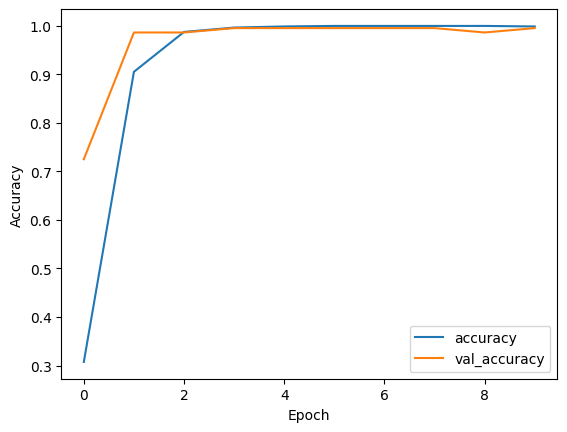

7/7 [==============================] - 0s 35ms/step - loss: 0.0242 - accuracy: 0.9955
Test accuracy: 0.9954954981803894


In [36]:
x = np.array(x).reshape(-1, 64, 64, 1)
y = np.array(y)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=10)

x_train = xtrain / 255.0
x_test = xtest / 255.0


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(11, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, ytrain, epochs=10, validation_data=(x_test, ytest))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(x_test, ytest)
print('Test accuracy:', test_acc)

model.save('braille_classifier.h5')


In [48]:
import pickle

In [49]:
with open('braille.pkl', 'wb') as file:
    pickle.dump(model, file)

In [46]:
decode = {0:'A', 1:'B',2:'C',3:'D', 4:'E', 5:'E', 6:'F',7:'G', 8:'H', 9:'I', 10:'J', 11:'K'}
img = cv2.imread('/content/E2 - Copy - Copy.jpeg', 0)
img = cv2.resize(img, (64, 64))
img = np.expand_dims(img, axis=-1) # add a new dimension to the image
img = img / 255.0 # normalize the pixel values
#plt.imshow(img[:,:,0], cmap='gray') # plot the image
prediction = model.predict(np.array([img]))[0] # make a prediction
decoded_prediction = decode[np.argmax(prediction)] # decode the prediction
print(decoded_prediction) # print the decoded prediction


1/1 [==============================] - 0s 37ms/step
E
